In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('position_salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
X= data.iloc[:,1:2].values
y= data.iloc[:,2].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train)

[[ 5]
 [10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]


In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [9]:
def viz_linear():
  plt.scatter(X,y, color= 'orange')
  plt.plot(X, lin_reg.predict(X), color = 'blue')
  plt.title('Linear Regression Model')
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.show()
  return

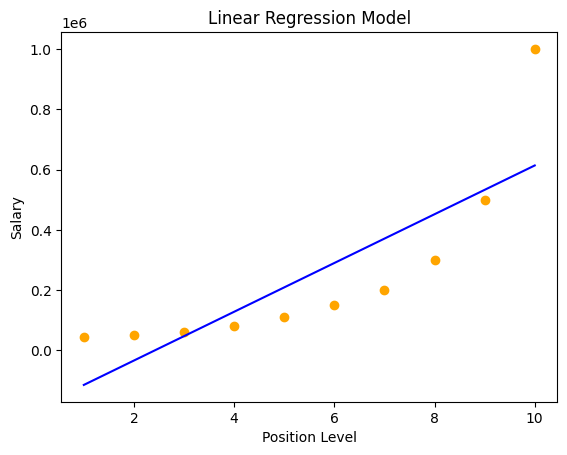

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


In [10]:
viz_linear()
y_pred= print(lin_reg.predict(X))

In [11]:
#Observation: The data points are scatttered and do not fit the line.

In [12]:
# Conclusions based on above observation: Try Polynomial regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()

In [33]:
print(X)
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [34]:
pol_reg.fit(X_poly, y)

LinearRegression()

In [35]:
def viz_polynomial():
  plt.scatter(X,y, color = 'orange')
  plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)), color ='blue')
  plt.title('Linear Regression with Polynomial with degree 4')
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.show()
  return

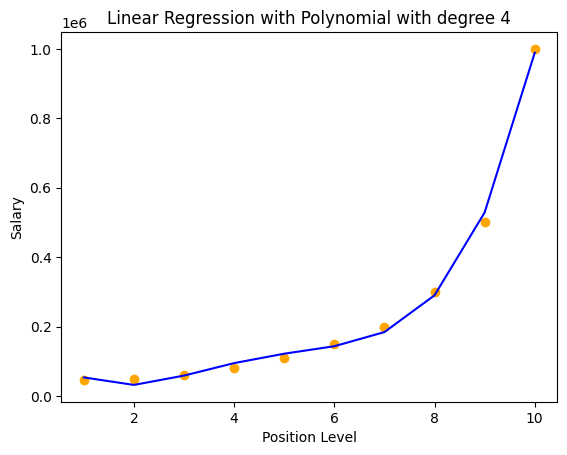

In [36]:
viz_polynomial()

In [37]:
# The regression line is able to fil maximum of the data points.

In [38]:
### Lets predict the values using both the algorithms.

In [39]:
# For Linear Regression:

lin_reg.predict([[5.5]])

array([249500.])

In [40]:
# For Polynomial Regression:

pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750002])

In [42]:
# Observations:

# From the above two outputs, it is clear that there is a difference between the two predictions.